# データの準備

In [1]:
import pandas as pd

kadai2X = pd.read_csv('kadai2X.csv')
kadai2y = pd.read_csv('kadai2y.csv')
kadai2X.head()

,count_1,routine_flg,period,campaign_name_入会費半額,campaign_name_入会費無料,class_name_オールタイム,class_name_デイタイム,gender_F
0,3,0,2,0,0,1,0,0
1,3,1,6,0,0,1,0,0
2,3,0,11,0,0,1,0,0
3,3,0,3,0,0,1,0,0
4,4,0,8,0,0,0,0,1


In [2]:
kadai2y.head()

,is_deleted
0,1
1,1
2,1
3,1
4,1


# ランダムフォレスト

In [3]:
# ライブラリのインポート
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


#　データの分割
X_train, X_test, y_train, y_test = train_test_split(kadai2X, kadai2y, random_state = 1)

#　ランダムフォレスト
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=100, 
                                random_state=1,
                                n_jobs=2)

#　トレーニング
forest.fit(X_train, y_train)

#　予測
y_test_pred = forest.predict(X_test)

print(y_test_pred)

C:\Users\yossi_seiho\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


[0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1
 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0
 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 1 0
 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 0 0 0
 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1
 0 1 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 0 1 0 1
 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1
 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1
 1 0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1
 1 0 0 0 1 1 0 1 1 0 0 1 

In [4]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.987
Accuracy on test set: 0.907


In [6]:
importance = pd.DataFrame({"feature_names":kadai2X.columns, "coefficient":forest.feature_importances_})
importance

,feature_names,coefficient
0,count_1,0.299294
1,routine_flg,0.171454
2,period,0.435799
3,campaign_name_入会費半額,0.035671
4,campaign_name_入会費無料,0.026597
5,class_name_オールタイム,0.010034
6,class_name_デイタイム,0.008747
7,gender_F,0.012403


C:\Users\yossi_seiho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yossi_seiho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20250 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yossi_seiho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36027 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yossi_seiho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21322 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yossi_seiho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 38989 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\yossi_seiho\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: Runtim

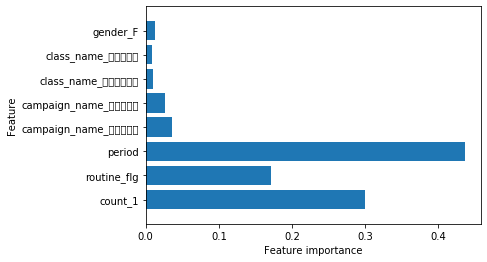

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_feature_importances_cancer(model):
    n_features = kadai2X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), kadai2X.keys())
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(forest)